<a href="https://colab.research.google.com/github/atharvakarnik/DataScience/blob/master/classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
#Downloading the dataset

data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_val, targets = data       #pixel_val is 70000*784 array of 70000 images of 28*28 sized data
targets = targets.astype(int)   #Existing dtype of targest is 'string'

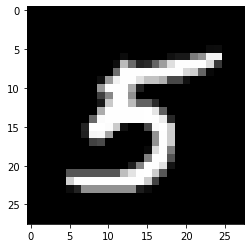

In [6]:
import random as rnd

rnd_img = pixel_val[rnd.randint(1,70000), :].reshape(28, 28)
plt.imshow(rnd_img, cmap='gray')

In [7]:
#Applyin ML Algorithm: t-SNE (t-Distributed Stochastic Neighbour Embedding)

tsne = manifold.TSNE(n_components=2, random_state=42)
trans_data = tsne.fit_transform(pixel_val[:3000, :])